In [1]:
library(alr4)

Loading required package: car
Loading required package: effects

Attaching package: 'effects'

The following object is masked from 'package:car':

    Prestige



In [2]:
head(Heights,2)

mheight,dheight
59.7,55.1
58.2,56.5


<h4>1.1>Histogram for dheight and mheight</h4>

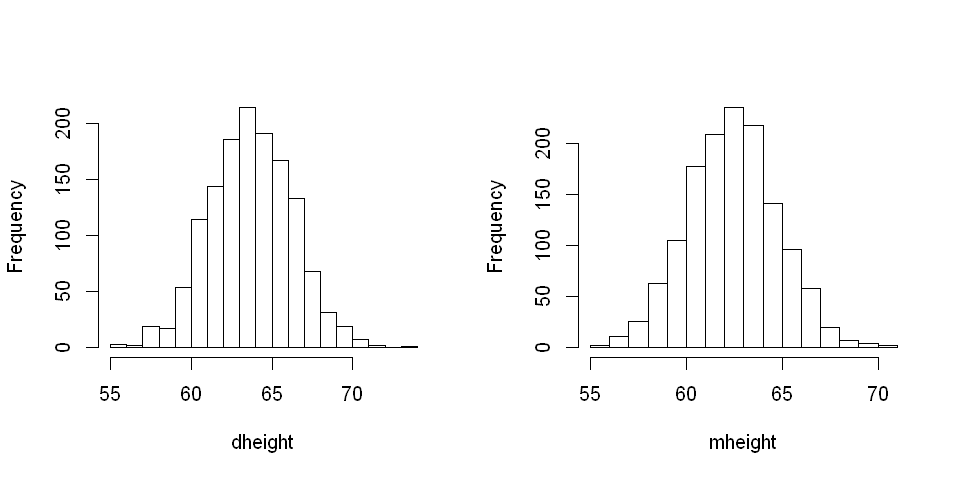

In [3]:
options(repr.plot.width=8, repr.plot.height=4)
attach(mtcars)
par(mfrow=c(1,2)) 
hist(Heights$dheight,breaks = 20,xlab = "dheight",main=NA)
#not completely normally distributed, but it is approximately normal
hist(x=Heights$mheight,breaks = 20,xlab = "mheight",main=NA)

<h4>1.2>Standard error for Height of mother in inches and feet</h4>

In [4]:
#standard error
std_error <- function(x) sd(x)/sqrt(length(x)) #sd/sqroot(n)
convert_inches_to_feets <- function(x) x/12
std_error(Heights$mheight) #standard error for mother's height
std_error(convert_inches_to_feets(Heights$mheight)) #standard error for mother's height in feet

[1] 0.06351241

[1] 0.005292701

<h4>1.3>90% Interval for E(mheight)</h4>

In [15]:
estimated_mean <- mean(Heights$mheight)
se_mheight <- std_error(Heights$mheight)
#0.05 critical value for degree of freedom sample size -1
df <- length(Heights$mheight) -1
tValue <- qt(0.95,df)
error <- tValue * se_mheight / sqrt(length(Heights$mheight))
lower_bound <- estimated_mean - error
upper_bound <- estimated_mean + error
sprintf("[%f,%f]",lower_bound,upper_bound)
print('If we randomly select samples for N times, then the E(mheight) is 90% probable to lie within the above given range')

[1] "[62.449981,62.455619]"

[1] "If we randomly select samples for N times, then the E(mheight) is 90% probable to lie within the above given range"


<h4>1.4>p-value for hypothesis E(mHeight)=62.75</h4>

In [6]:
#for E(mHeight) = 62.75
e_mheight <- 62.75
t <- (e_mheight - estimated_mean)/se_mheight
p <- 2*pt(-abs(t),df)
p

[1] 3.161029e-06

<h3>1.5>normally distributed with population mean 62.5 inches and population variance 5.5 inches</h3>

<h4>a.probability that a randomly selected mother has height less than 68 inches</h4>

In [7]:
mean_mheight = 62.5
sd_mheight = sqrt(5.5)
pnorm(q = 68,mean = mean_mheight,sd = sd_mheight)

[1] 0.9904918

<h4>b.probability that a randomly selected mother has height between 60 and 65 inches</h4>

In [8]:
pnorm(q = 65,mean = mean_mheight,sd = sd_mheight) - pnorm(q = 60,mean = mean_mheight,sd = sd_mheight) 

[1] 0.713578

<h4>c.number v such that Pr(E(mheight) –v < mheight < E(mheight) + v) = 0.95</h4>

In [9]:
#for 0.95 probability v should be in 2 standard deviation from mean. So v=2*sd
v= 2*sd_mheight
v

[1] 4.690416

<h4>d. 0.25 quantile of mheight</h4>

In [10]:
qnorm(p=0.25,mean=mean_mheight,sd=sd_mheight)

[1] 60.91818

<h4>e. first quatile and median</h4>

In [11]:
qnorm(p=0.25,mean=mean_mheight,sd=sd_mheight) #Quartile
qnorm(p=0.5,mean=mean_mheight,sd=sd_mheight) #Mean

[1] 60.91818

[1] 62.5

<h4>f. 95% confidence interval for mheight</h4>

In [12]:
#As both mean and stddev of the population is known and as it follows the normal distribution, 95% confidence interval would be
#with in 2 standard deviation from the mean
random_h <- sample(Heights$mheight,1)
error = pnorm(0.975) * sd_mheight
sprintf("[%f,%f]",mean_mheight-error,mean_mheight+error)

[1] "[60.541236,64.458764]"

<h4>1.6 T test for two corelated data's expected values

In [14]:
#Null Hypothesis is mean_d = 0
#assuming signficance level alpha = 0.05
d <- Heights$mheight - Heights$dheight

alpha <- 0.05
p <- alpha
df <- length(d)-1
tc <- qt(p,df)
print(tc) #we reject if d is much less than this critical t

mean_d<- mean(d)
se_d <- std_error(d)
t <- mean_d/se_d
print(t)
print('rejected null hypothesis as t is much less than t crtical')

[1] -1.645963
[1] -19.18397
[1] "rejected null hypothesis as t is much less than t crtical"
